In [5]:
import sys
print(sys.version)
import os
print(os.getcwd())

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
C:\Users\Andrew\Downloads


In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import disk, skeletonize, binary_dilation, binary_erosion, binary_closing
# import cv2
# from skimage import filters
imgs = []
W_IMG = 1024
with open('patient2/X.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    cnt = 0
    for row in csv_reader:
#         print(cnt)
        cnt+=1
        for i in range(0, len(row), W_IMG):
            if len(imgs) <= i:
                imgs.append([])
            # print(i//W_IMG, i+W_IMG, len(imgs), imgs[-1], len(list(map(lambda x: float(x), row))))
            imgs[i//W_IMG].append( list(map(lambda x: float(x), row))[i:i+W_IMG] )
roi = np.array(imgs[10])


KeyboardInterrupt: 

In [45]:
cbv = []
with open('patient55/CBV.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    cnt = 0
    for row in csv_reader:
        cbv.append( list(map(lambda x: float(x), row)) )
plt.imsave('cbv.jpg', np.array(cbv), cmap=plt.cm.bone)

In [ ]:
def saveImages(imgs):
    print(len(imgs), len(imgs[0]), imgs[-1])
    for i in range(len(imgs)-1):
        fname = "image"+str(i)+".jpg"
        print(fname)
        plt.imsave(fname, np.array(imgs[i]), cmap=plt.cm.bone)

In [ ]:
plt.imshow(roi55, cmap=plt.cm.bone)

In [ ]:
base = np.array(imgs55[1])
plt.imshow(base, cmap=plt.cm.bone)

In [ ]:
img = roi55-base
plt.imshow(img, cmap=plt.cm.bone)

In [ ]:
filtered = sk.filters.gaussian(img, sigma=1.5)
plt.imshow(filtered, cmap=plt.cm.bone)

In [ ]:
f = sk.filters.meijering(filtered)
plt.imshow(f, cmap=plt.cm.bone)

In [ ]:
b = sk.filters.frangi(filtered)
plt.imshow(b, cmap=plt.cm.bone)

In [ ]:
fig, ax = sk.filters.try_all_threshold(f, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
thresh = sk.filters.threshold_otsu(b)
binary = b > thresh
# inv = sk.util.invert(binary)
plt.imshow(binary, cmap=plt.cm.bone)

In [ ]:
skeleton = skeletonize(binary)
plt.imshow(skeleton, cmap=plt.cm.bone)

In [ ]:
dkernel = np.ones((7, 7), np.uint8)
dilate = binary_dilation(binary, dkernel)
plt.imshow(dilate, cmap=plt.cm.bone)

In [ ]:
# thresh = sk.filters.threshold_mean(roi)
# bi = filtered > thresh
# i = sk.util.invert(bi)

In [ ]:
# med = sk.filters.median(i, selem=np.ones((18, 18)))

# med[med == 255] = 1
# s = skeletonize(med)
# dkernel = np.ones((7,7), np.uint8)

# d = binary_dilation(s, dkernel)
# plt.imshow(d, cmap=plt.cm.bone)

In [6]:
imgs55 = []
# W_IMG = 1024
with open('patient55/X.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    cnt = 0
    for row in csv_reader:
        print(cnt)
        cnt+=1
        for i in range(0, len(row), W_IMG):
            if len(imgs55) <= i:
                imgs55.append([])
#             print(i//W_IMG, i+W_IMG, len(imgs55), len(list(map(lambda x: float(x), row))))
            imgs55[i//W_IMG].append( list(map(lambda x: float(x), row))[i:i+W_IMG] )
    roi55 = np.array(imgs[10])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

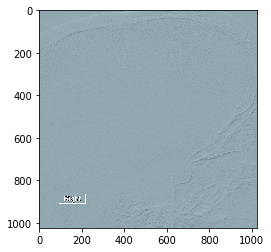

In [7]:
plt.imshow(imgs55[1], cmap=plt.cm.bone)

In [ ]:
# print(len(imgs), len(imgs[0]), imgs[-1])
for i in range(len(imgs55)-1):
    fname = "55image"+str(i)+".jpg"
    print(fname)
    plt.imsave(fname, np.array(imgs55[i]), cmap=plt.cm.bone)

In [ ]:
def saveVesselize(imgs55):
    base = np.array(imgs55[1])
    for i in range(2, 20):
        img = np.array(imgs55[i])-base
        filtered = sk.filters.gaussian(img, sigma=2)
        fname = "55image"+str(i)+".jpg"
        print(fname)
        
#         plt.imshow(filtered, cmap=plt.cm.bone)
        b = sk.filters.frangi(filtered)
        plt.imsave(fname, b, cmap=plt.cm.bone)
#         plt.imshow(b, cmap=plt.cm.bone)
#         plt.imshow(base, cmap=plt.cm.bone)
# vesselize(imgs55)

In [ ]:
cbv_filtered = sk.filters.gaussian(sk.util.invert(np.array(cbv)), sigma=2)
cbv_vessel = sk.filters.frangi(cbv_filtered)
plt.imshow(sk.util.invert(np.array(cbv)), cmap=plt.cm.bone)
# fig, ax = sk.filters.try_all_threshold(cbv_vessel, figsize=(10, 8), verbose=False)
# plt.show()

In [8]:
def filterImages(imgs, ftype='gaussian'):
    res = []
    #hardcoded
    for i in range(20):
        img = np.array(imgs[i])
#         img -= base
        if ftype == 'gaussian':
            img = sk.filters.gaussian(np.array(img), sigma=2)
        if ftype =='median':
            om = np.max(img)
            old = np.square(img)
            m = np.max(old)
            a = old/m
            img = sk.filters.median(a)
            img = np.multiply(img, om)
        res.append(img)
    return res
filteredImgs = filterImages(imgs55)
filteredImgsMed = filterImages(imgs55, 'median')

C:\Users\Andrew\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [9]:
def getTotalChange(imgs):
    last = imgs[0]
    px = np.zeros((len(imgs[0]), len(imgs[0][0])))
    # Hardcoded that there are 20 images
    cnt = 0
    for i in range(20):
        for r in range(len(imgs[i])):
            for c in range(len(imgs[i][0])):
                cnt += 1
                px[r][c] += np.absolute(imgs[i][r][c]-last[r][c])
        last = imgs[i]
    print(cnt)
    return px
#         print(len(imgs[i]), len(imgs[i][0]))
#         for r in range()
histChanges = getTotalChange(filteredImgs)

20971520


In [ ]:
# val = np.zeros((W_IMG, W_IMG))
# print(val.shape)
# for key in histChanges.keys():
# #     print(histChanges[key])
#     val[key[0]][key[1]] = histChanges[key]

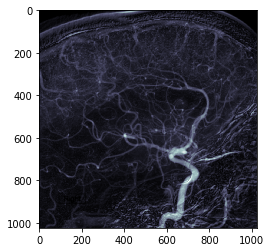

In [10]:
plt.imshow(histChanges, cmap=plt.cm.bone)

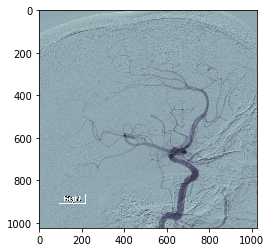

In [11]:
plt.imshow(imgs55[4], cmap=plt.cm.bone)

In [ ]:
# print(np.max(roi55))

# a = np.multiply(a, m)
a = sk.filters.frangi(filteredImgs[2])
plt.imshow(a, cmap=plt.cm.bone)
#plan
#     compare to previous image, if it is much darker compared to threshold, then flow is coming into the point
#     how to choose threshold? maybe do average or something, see if blur and vessel helped 

In [42]:
plt.imsave('4.jpg', filteredImgs[4], cmap=plt.cm.bone)

-9.281019874059972


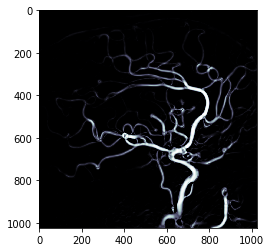

In [161]:
im1, im2 = filteredImgs[3], filteredImgs[4]
diff = im2-im1
print(np.mean(diff))
frangi_diff = sk.filters.frangi(diff)
# histo(frangi_diff)
plt.imshow(frangi_diff, cmap = plt.cm.bone)

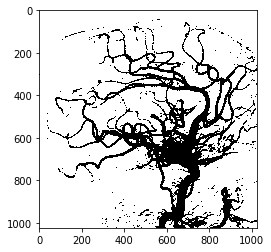

In [162]:
# f = np.copy(frangi_diff)
# for r in range(W_IMG):
#     for c in range(W_IMG):
#         print(frangi_diff[r][c])
#         if frangi_diff[r][c] != 0:
#             frangi_diff[r][c] = 1
mean = sk.filters.threshold_mean(diff)
bi = diff > mean
# print(a)
plt.imshow(bi, cmap=plt.cm.bone)

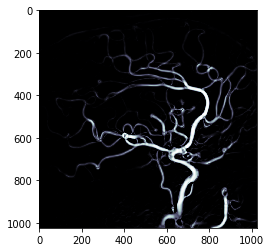

In [163]:
def identifyChange(prev, cur):
    diff = 20
    img = np.zeros((W_IMG, W_IMG))
    for r in range(W_IMG):
        for c in range(W_IMG):
            if prev[r][c] - cur[r][c] > diff:
                img[r][c] = 1
            else:
                img[r][c] = 0
    return img
change = identifyChange(im1, im2)
plt.imshow(frangi_diff, cmap=plt.cm.bone)

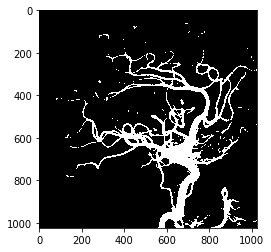

In [164]:
# ch = np.zeros((W_IMG, W_IMG))
# for r in range(W_IMG):
#     for c in range(W_IMG):
#         if change[r][c] == 0:
#             ch[r][c] = 0
#         if change[r][c] == 533:
#             ch[r][c] = 1
# filteredChange = sk.filters.median(ch)
filteredChange = sk.morphology.closing(change)
# plt.imshow(filteredChange, cmap=plt.cm.bone)

dkernel = np.ones((1, 1), np.uint8)
dilate = sk.morphology.dilation(filteredChange, dkernel)
plt.imshow(dilate, cmap=plt.cm.bone)

[(1.0, 119112), (0.0, 929464)]


C:\Users\Andrew\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


[(1, 118665), (0, 929911)]


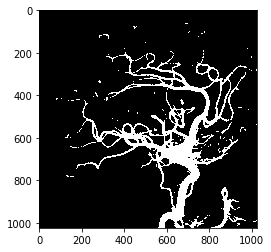

In [165]:
def histo(imgs55):
    hist = {}
    for r in range(W_IMG):
        for c in range(W_IMG):
    #         print(el)
            hist[imgs55[r][c]] = hist.get(imgs55[r][c], 0) + 1
    print(sorted(hist.items(), key=lambda x: x[1]))
histo(filteredChange)
# ch = np.zeros((W_IMG, W_IMG))
# for r in range(W_IMG):
#     for c in range(W_IMG):
#         if filteredChange[r][c] == 0:
#             ch[r][c] = 0
#         if filteredChange[r][c] == 533:
#             ch[r][c] = 1
filteredD = sk.filters.median(filteredChange)
filteredD[filteredD==255] = 1
histo(filteredD)
# histo(frangi_diff)
dkernel = np.ones((4, 4), np.uint8)
dilate = sk.morphology.dilation(filteredChange, dkernel)
plt.imshow(filteredD, cmap=plt.cm.bone)

In [166]:
skel = skeletonize(filteredD)
# dkernel = np.ones((10, 10), np.uint8)
# dilate = sk.morphology.dilation(edges, dkernel)
# plt.imshow(edges, cmap=plt.cm.bone)

In [141]:
plt.imsave("skeleton.jpg",edges, cmap=plt.cm.bone)

In [167]:
def findStartingPoint(img):
    found = False
    points = []
    for r in range(W_IMG-1, -1, -1):
        if found: return points
        for c in range(W_IMG):
            if img[r][c] != 0:
                points.append((r,c))
                found = True
#                 print(r, c)
#                 return
    
starts = findStartingPoint(filteredD)
print(starts)

[(1023, 558), (1023, 559), (1023, 560), (1023, 561), (1023, 562), (1023, 563), (1023, 564), (1023, 565), (1023, 566), (1023, 567), (1023, 568), (1023, 569), (1023, 570), (1023, 571), (1023, 572), (1023, 573), (1023, 574), (1023, 575), (1023, 576), (1023, 577), (1023, 578), (1023, 579), (1023, 580), (1023, 581), (1023, 582), (1023, 583), (1023, 584), (1023, 585), (1023, 586), (1023, 587), (1023, 588), (1023, 589), (1023, 590), (1023, 591), (1023, 592), (1023, 593), (1023, 594), (1023, 643), (1023, 644), (1023, 645), (1023, 646), (1023, 647), (1023, 648), (1023, 649), (1023, 650), (1023, 651), (1023, 652), (1023, 653), (1023, 654), (1023, 655), (1023, 656), (1023, 657), (1023, 658), (1023, 659), (1023, 660), (1023, 661), (1023, 662), (1023, 663), (1023, 664), (1023, 665), (1023, 666), (1023, 667), (1023, 668), (1023, 669), (1023, 670), (1023, 671), (1023, 672), (1023, 673), (1023, 674), (1023, 675), (1023, 676), (1023, 677), (1023, 678), (1023, 679), (1023, 680), (1023, 681), (1023, 712)

In [144]:
class Point:
    def __init__(self, r, c, prevs=[], nexts=[], isEdge=False):
        self.r = r
        self.c = c
        self.prevs = prevs
        #lowkey dont need nexts
        self.nexts = nexts
        self.isEdge = isEdge
    def __str__(self):
        return "{} row  {} col {} prevs {} nexts".format(self.r, self.c, self.prevs, self.nexts)

def isEdge(r, c, img):
    enums = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1,1)]
    for (dr, dc) in enums:
        newr = dr + r
        newc = dc + c
        if newr < 0 or newr >= W_IMG or dc + newc < 0 or newc >= W_IMG:
            continue
        if img[newr][newc] == 0:
            return True
    return False
def edgeDirections(starts, img):
    visited = {}
    enums = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1,1)]
    queue = []
    front = True
    print(starts)
    while len(starts) > 0:
        el = starts.pop()
        p=Point(el[0], el[1], isEdge=isEdge(el[0], el[1], img))
        queue.append(p)
#         print(el)
    vField = [[0 for _ in range(W_IMG)] for i in range(W_IMG)]
    cnt = 0
    while len(queue) > 0:
        point = queue.pop(0)
        r, c = point.r, point.c
        
        if (r,c) in  visited: continue
        visited[(r, c)] = point
            
        cnt += 1
        if cnt %100 == 0: 
            print(cnt)
            
        for prev in point.prevs:
            vField[prev.r][prev.c] = (point.r-prev.r, point.c-prev.c)
            
        for (dr, dc) in enums:
            newr = dr + r
            newc = dc + c

            if newr < 0 or newr >= W_IMG or dc + newc < 0 or newc >= W_IMG:
                continue
            if img[newr][newc] == 1 and isEdge(newr, newc, img):
                newPoint = Point(newr, newc, [point])
                print(dr, dc)
                queue.append(newPoint)
    return vField
# field = edgeDirections(list(starts), skeleton)
# histo(field)
        

In [152]:
def flooding(starts, img):
    queue = []
    visited = {}
    enums = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1,1)]
    vField = [[[] for _ in range(W_IMG)] for i in range(W_IMG)]
    #dfs/bfs
    cnt = 0
    print(starts)
    frameField = [[[0,0, False] for _ in range(W_IMG)] for i in range(W_IMG)]
    for start in starts:
        r,c = start
        if img[r][c] == 1:
            frame
            p=Point(r,c)
            queue.append(p)
#     prev = skels[0]
    
    print(queue)
    curRound = queue
    nxtRound = []
    visitedThisRound = {}
    while 1:
        while len(curRound) > 0:
            point = curRound.pop(0)
            r, c = point.r, point.c
            #not correct for now
            if (r,c) in  visited: 
                continue
            visitedThisRound[(r, c)] = True
            visited[(r, c)] = point

            cnt += 1
            if cnt %100 == 0: 
                print(cnt)
            for (dr, dc) in enums:
                newr = dr + r
                newc = dc + c
                if newr < 0 or newr >= W_IMG or dc + newc < 0 or newc >= W_IMG:
                    continue
                if img[newr][newc] == 1:
                    if (newr, newc) in visited and (newr, newc) not in visitedThisRound:
                        continue
                    frameField[newr][newc][0] += dr
                    frameField[newr][newc][1] += dc
                    frameField[newr][newc][2] = True
                    newPoint = Point(newr, newc, [point])
                    nxtRound.append(newPoint)
    #                 queue.append(newPoint)
        curRound = list(nxtRound)
        nxtRound = []
        visitedThisRound = {}
        if len(curRound) == 0: break
                
    vt = [[0 for _ in range(W_IMG)] for i in range(W_IMG)]
    for r in range(W_IMG):
        for c in range(W_IMG):
            if frameField[r][c][0] > 0:
                vt[r][c] += 0.5
            else:
                vt[r][c] -= 0.5
            if frameField[r][c][1] > 0:
                vt[r][c] += 0.5
            else:
                vt[r][c] -= 0.5
#             if frameField[r][c][0] != 0 or frameField[r][c][1] != 0:
# #             if frameField[r][c][2]:
#                 vt[r][c] = 1
#             else:
#                 vt[r][c] = 0
    return frameField
# histo(filteredD)
a = flooding(list(starts), filteredD)
import json
with open('vfield.json', 'w') as outfile:  
    data="field="+json.dumps(a)
    outfile.write(data)
# a = np.array(a)
# a = sk.filters.sobel(filteredD)
# plt.imsave("Aa.jpg",a, cmap=plt.cm.bone)
# plt.imshow(a, cmap=plt.cm.bone)
#     for skel in skels[1:]:

# def edgeDirectionsChange(starts, skels):
#     queue = []
#     vField = [[[] for _ in range(W_IMG)] for i in range(W_IMG)]
#     #dfs/bfs
#     for start in starts:
#         r,c = start
#         if skel[r][c] == 1:
#             p=Point(r,c)
#             queue.append(p)
#     prev = skels[0]
#     for skel in skels[1:]:
        #check if a white point has a neighbor who is white and used to be black
            #if it does, flood it

[(1023, 385), (1023, 386), (1023, 387), (1023, 557), (1023, 812), (1023, 813), (1023, 814), (1023, 907), (1023, 908), (1023, 909)]
[<__main__.Point object at 0x000000C02BE51E10>, <__main__.Point object at 0x000000C00958F1D0>, <__main__.Point object at 0x000000C00E928400>, <__main__.Point object at 0x000000C02E3FEFD0>, <__main__.Point object at 0x000000C0135203C8>, <__main__.Point object at 0x000000C012656630>, <__main__.Point object at 0x000000C02C42D828>, <__main__.Point object at 0x000000C00B8D1B38>, <__main__.Point object at 0x000000C00B8D1C18>, <__main__.Point object at 0x000000C01263B470>]
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
82

In [168]:
starts = findStartingPoint(skel)
#hardcode
print(starts)
skelStarts = []
for r,c in starts:
    if c > 550 and c < 850:
        skelStarts.append((r,c))
print(skelStarts)

def edgeDirectionsSkel(starts, skel):
    visited = {}
    enums = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1,1)]
    queue = []
    front = True
#     print(starts)
    while len(starts) > 0:
        el = starts.pop()
        p=Point(el[0], el[1])
        queue.append(p)
        print(el)
    vField = [[[] for _ in range(W_IMG)] for i in range(W_IMG)]
    cnt = 0
    while len(queue) > 0:
        point = queue.pop(0)
        r, c = point.r, point.c
        
        if (r,c) in  visited: continue
        visited[(r, c)] = point
            
        cnt += 1
        if cnt %100 == 0: 
            print(cnt)
            
        for prev in point.prevs:
            if len(vField[prev.r][prev.c]) > 0:
                print('WOOOWOW')
            vField[prev.r][prev.c].append([point.r-prev.r, point.c-prev.c])
            
        for (dr, dc) in enums:
            newr = dr + r
            newc = dc + c

            if newr < 0 or newr >= W_IMG or dc + newc < 0 or newc >= W_IMG:
                continue
            if skel[newr][newc] == 1:
#                 vField[r][c].append([dr, dc])
                newPoint = Point(newr, newc, prevs=[point])
#                 print(dr, dc)
                queue.append(newPoint)
    return vField
a = edgeDirectionsSkel(skelStarts, skel)
import json
with open('vfield.json', 'w') as outfile:  
    data="field="+json.dumps(a)
    outfile.write(data)
print(skelStarts)

[(1023, 593), (1023, 594), (1023, 726), (1023, 727), (1023, 806)]
[(1023, 593), (1023, 594), (1023, 726), (1023, 727), (1023, 806)]
(1023, 806)
(1023, 727)
(1023, 726)
(1023, 594)
(1023, 593)
WOOOWOW
WOOOWOW
WOOOWOW
100
WOOOWOW
200
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
300
WOOOWOW
WOOOWOW
400
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
500
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
600
WOOOWOW
700
WOOOWOW
800
WOOOWOW
WOOOWOW
WOOOWOW
900
WOOOWOW
WOOOWOW
WOOOWOW
1000
WOOOWOW
1100
WOOOWOW
1200
1300
WOOOWOW
WOOOWOW
1400
1500
WOOOWOW
WOOOWOW
1600
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
1700
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
1800
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
1900
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
2000
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
2100
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
2200
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
2300
2400
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
WOOOWOW
2500
WOOOWOW
WOOOWOW
WOOOWOW
2600
WOOOWOW
WOOOWOW
WOOOWOW

In [139]:
plt.imsave("filteredD.jpg", np.array(filteredD), cmap=plt.cm.bone)
plt.imsave("a.jpg", a, cmap=plt.cm.bone)
plt.imsave("sa.jpg", skeletonize(filteredD), cmap=plt.cm.bone)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
enums = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1,1)]
color = [50, 100, 150, 200, 250, 300, 350, 400]
res = np.zeros((W_IMG, W_IMG))
for r in range(W_IMG):
    for c in range(W_IMG):
        if field[r][c] == 0: continue
#         print(enums.index(field[r][c]), field[r][c])
        res[r][c] = color[enums.index(field[r][c])]


In [ ]:
plt.imsave("a.jpg", res[500:, 500:800], cmap=plt.cm.bone)
plt.imshow(res, cmap=plt.cm.bone)

In [ ]:
plt.imshow(filteredD, cmap=plt.cm.bone)

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

M_PI = 3.14159265358979323846
KERNEL = 5
COLOUR_OR_GRAY = 0
input_img = "55image4.jpg"
SIZE = (1024, 1024, 3)

flowField = np.zeros(SIZE, dtype = np.float32)
refinedETF = np.zeros(SIZE, dtype = np.float32)
gradientMag = np.zeros(SIZE, dtype = np.float32)

####################
# Generate ETF 
####################
#memo
 #cv2.normalize(src[, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]])：正規化
 #cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])：微分
 #cv2.magnitude(x, y[, magnitude])：2次元ベクトルの大きさ

def initial_ETF(input_img, size):
    global flowField
    global refinedETF
    global gradientMag
    
    src = cv2.imread(input_img, COLOUR_OR_GRAY)
    src_n = np.zeros(size, dtype = np.float32)
    src_n = cv2.normalize(src.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)

    #Generate grad_x and grad_y
    grad_x = []
    grad_y = []
    grad_x = cv2.Sobel(src_n, cv2.CV_32FC1, 1, 0, ksize=5)
    grad_y = cv2.Sobel(src_n, cv2.CV_32FC1, 0, 1, ksize=5)
    
    #Compute gradient
    gradientMag = cv2.sqrt(grad_x**2.0 + grad_y**2.0) 
    gradientMag = cv2.normalize(gradientMag.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    h,w = src.shape[0], src.shape[1]
    print(h,w)
    for i in range(h):
        for j in range(w):
            u = grad_x[i][j]
            v = grad_y[i][j]
            n = np.array([v, u, 0.0])
            cv2.normalize(np.array([v, u, 0.0]).astype('float32'), n)
            flowField[i][j] = n
    rotateFlow(flowField, flowField, 90.0)

def rotateFlow(src, dst, theta):
    theta = theta / 180.0 * M_PI;
    h,w = src.shape[0], src.shape[1]
    for i in range(h):
        for j in range(w):
            v = src[i][j]
            rx = v[0] * np.cos(theta) - v[1] * np.sin(theta)
            ry = v[1] * np.cos(theta) + v[0] * np.sin(theta)
            flowField[i][j] = [rx, ry, 0.0]

def refine_ETF(kernel):
    global flowField
    global refinedETF
    global gradientMag
    h_f,w_f = flowField.shape[0], flowField.shape[1]
    for r in range(h_f):
        print(r)
        for c in range(w_f):
            computeNewVector(c, r, kernel)
    flowField = copy.deepcopy(refinedETF)
    
#Paper's Eq(1)
def computeNewVector(x, y, kernel):
    global flowField
    global refinedETF
    global gradientMag
    t_cur_x = flowField[y][x]
    t_new = (0, 0, 0)
    h_r,w_r = refinedETF.shape[0], refinedETF.shape[1]
    for r in range(y - kernel, y + kernel + 1):
        for c in range(x - kernel, x + kernel + 1):
#             print(r, c)
            if (r < 0 or r >= h_r or c < 0 or c >= w_r): 
                continue
            t_cur_y = flowField[r][c]
            a = np.array([x, y])
            b = np.array([c, r])
            phi = computePhi(t_cur_x, t_cur_y);
            w_s = computeWs(a, b, kernel);
            w_m = computeWm(gradientMag[y][x], gradientMag[r][c])
            w_d = computeWd(t_cur_x, t_cur_y)
            t_new += phi * t_cur_y * w_s * w_m * w_d
    n = t_new
    cv2.normalize(t_new, n)
    refinedETF[y][x] = n

#Paper's Eq(5)
def computePhi(x, y):
    if np.dot(x,y) > 0:
        return 1
    else:
        return -1
    
#Paper's Eq(2)
def computeWs(x, y, r):
    if np.linalg.norm(x-y) < r:
        return 1
    else:
        return 0

#Paper's Eq(3)
def computeWm(gradmag_x, gradmag_y):
    wm = (1 + np.tanh(gradmag_y - gradmag_x)) / 2
    return wm

#Paper's Eq(4)
def computeWd(x, y):
    return abs(x.dot(y))

#plot arrowline and save image.
def draw_arrowline(count,KERNEL):
    global flowField
    dis = cv2.imread(input_img, COLOUR_OR_GRAY)
    resolution = 10;
    h,w = dis.shape[0], dis.shape[1]
    for i in range(0,h,resolution):
        for j in range(0,w,resolution):
            v = flowField[i][j]
            p = (j, i)
            p2 = (int(j+v[1]*5), int(i+v[0]*5))
            dis = cv2.arrowedLine(dis, p, p2, (255, 0, 0), 1, 8, 0, 0.3)
    cv2.imwrite('etf_kernel' + str(KERNEL) + '_' + str(count) +'.png',dis)
    np.save('np_etf_kernel' + str(KERNEL) + '_' + str(count) +'.npy', flowField)

initial_ETF(input_img, SIZE)
print('intied')
for i in range(10):
    print(i)
    refine_ETF(KERNEL)
    print('refined')
    draw_arrowline(i,KERNEL)
    print('drawn')

In [ ]:
direction does not change!!! if there is a field on that point, do not reset it

horizontal interpolation of slopes, 
if a closing edge is found that was not known before, start that as a starting point for edge
if starting edge is found not known before, start that as a starting point 
from the good starting like 3, we know flow continues in the same direction unless it hits a wall, 
    which then we can calculate a new flow(will help with loops)